Dimensions après troncature : (736, 736, 3)


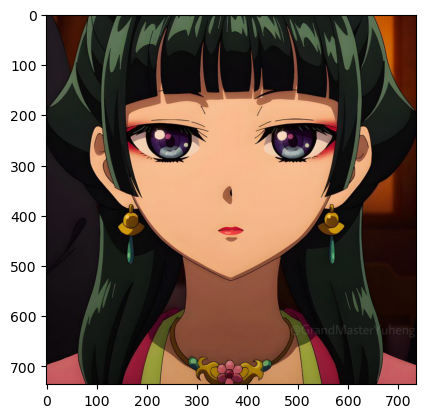

In [78]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
### lecture de limage 
image_path = 'maomao.jpg'

image = mpimg.imread(image_path)
#print(image)
print(f"Dimensions après troncature : {image.shape}")#afficher la dimension de limage tronqué
plt.imshow(image)
plt.show()


##  Tronquer l’image à des multiples de 8 en x et y


Dimensions après troncature : (736, 736, 3)


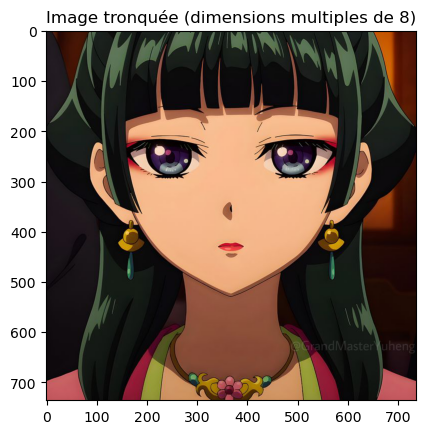

In [79]:
hauteur, largeur = image.shape[:2]  # Extraire hauteur et largeur
new_hauteur = (hauteur // 8) * 8  # Plus grand multiple de 8 inférieur ou égal à la hauteur
new_largeur = (largeur// 8) * 8    # Plus grand multiple de 8 
image_tronque = image[:new_hauteur, :new_largeur]
print(f"Dimensions après troncature : {image_tronque.shape}")#afficher la dimension de limage tronqué
plt.imshow(image_tronque)
plt.title("Image tronquée (dimensions multiples de 8)")
plt.show()



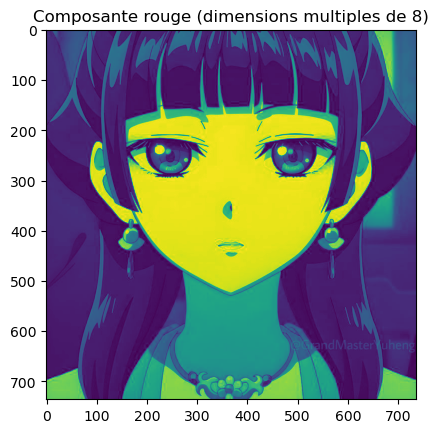

In [80]:
composante_rouge = image[:, :, 0]  # Composante rouge (2D)
# Calculer les nouvelles dimensions (multiples de 8)
hauteur, largeur = composante_rouge.shape[:2]
new_height = (hauteur // 8) * 8  # Plus grand multiple de 8 inférieur ou égal à la hauteur
new_width = (largeur // 8) * 8    # Plus grand multiple de 8 inférieur ou égal à la largeur

# Tronquer la composante rouge
composante_rouge_tronquée = composante_rouge[:new_height, :new_width]
plt.imshow(composante_rouge_tronquée)  # Affichage en niveaux de gris
plt.title("Composante rouge (dimensions multiples de 8)")
plt.show()



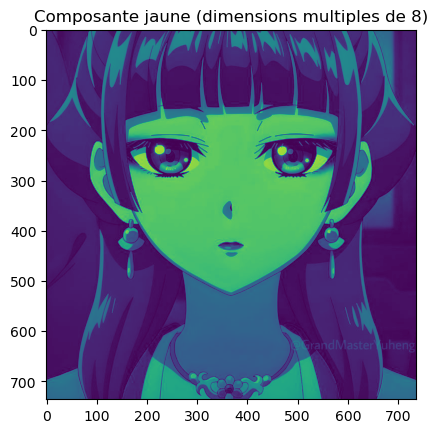

In [81]:
yellow_component = image[:, :, 1]  # Composante jaune (2D)
# Calculer les nouvelles dimensions (multiples de 8)
hauteur, largeur = yellow_component.shape[:2]
new_height = (hauteur // 8) * 8  # Plus grand multiple de 8 inférieur ou égal à la hauteur
new_width = (largeur // 8) * 8    # Plus grand multiple de 8 inférieur ou égal à la largeur

# Tronquer la composante jaune
truncated_yellow_component = yellow_component[:new_height, :new_width]
plt.imshow(truncated_yellow_component)  # Affichage en niveaux de gris
plt.title("Composante jaune (dimensions multiples de 8)")
plt.show()

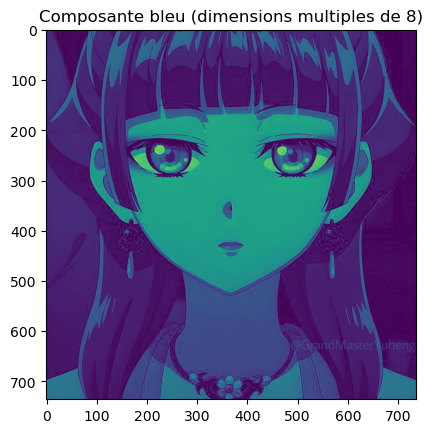

In [82]:
bleu_component = image[:, :, 2]  # Composante bleu (2D)
# Calculer les nouvelles dimensions (multiples de 8)
hauteur, largeur = bleu_component.shape[:2]
new_height = (hauteur // 8) * 8  # Plus grand multiple de 8 inférieur ou égal à la hauteur
new_width = (largeur // 8) * 8    # Plus grand multiple de 8 inférieur ou égal à la largeur

# Tronquer la composante jaune
truncated_bleu_component = bleu_component[:new_height, :new_width]
plt.imshow(truncated_bleu_component)  # Affichage en niveaux de gris
plt.title("Composante bleu (dimensions multiples de 8)")
plt.show()

In [83]:
# Normaliser les intensités si nécessaire (flottants entre 0 et 1)
if composante_rouge.max() <= 1.0:
     composante_rouge= (composante_rouge * 255).astype(int)  # Convertir en entiers entre 0 et 255

# Centrer les intensités entre -128 et 127
composante_rouge_centrée = composante_rouge - 128
print(f"Matrice centrée :\n{composante_rouge_centrée}")

Matrice centrée :
[[160 160 162 ... 200 199 199]
 [160 160 162 ... 200 199 199]
 [160 160 162 ... 200 199 199]
 ...
 [ 65  65  65 ...  65  65  65]
 [ 65  65  65 ...  65  65  65]
 [ 65  65  65 ...  65  65  65]]


In [84]:
P=np.zeros((8,8))
for i in range (8):
    for j in range (8):
        if i==0:
            ck=1/math.sqrt(2)
        else:
            ck=1
        P[i,j]= (1/2)*ck*math.cos(((2*j+1)*i*math.pi)/16)
        
print(f"Matrice P (matrice de passage) :{P}")


Matrice P (matrice de passage) :[[ 0.35355339  0.35355339  0.35355339  0.35355339  0.35355339  0.35355339
   0.35355339  0.35355339]
 [ 0.49039264  0.41573481  0.27778512  0.09754516 -0.09754516 -0.27778512
  -0.41573481 -0.49039264]
 [ 0.46193977  0.19134172 -0.19134172 -0.46193977 -0.46193977 -0.19134172
   0.19134172  0.46193977]
 [ 0.41573481 -0.09754516 -0.49039264 -0.27778512  0.27778512  0.49039264
   0.09754516 -0.41573481]
 [ 0.35355339 -0.35355339 -0.35355339  0.35355339  0.35355339 -0.35355339
  -0.35355339  0.35355339]
 [ 0.27778512 -0.49039264  0.09754516  0.41573481 -0.41573481 -0.09754516
   0.49039264 -0.27778512]
 [ 0.19134172 -0.46193977  0.46193977 -0.19134172 -0.19134172  0.46193977
  -0.46193977  0.19134172]
 [ 0.09754516 -0.27778512  0.41573481 -0.49039264  0.49039264 -0.41573481
   0.27778512 -0.09754516]]


## compression

In [85]:
# initialisation de Q : matrice de quantification Q dans la norme de compression JPEG
Q=np.array([[16,11,10,16,24,40,51,61],
            [12,12,13,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

Taux de compression : 85.28%


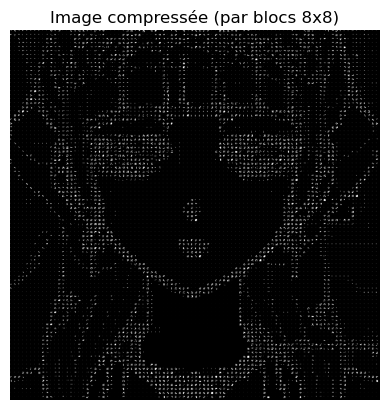

In [86]:
# Dimensions de l'image
haureur, largeur = composante_rouge_centrée.shape
image_compressée = np.zeros_like(composante_rouge_centrée)

# Parcourir l'image par blocs 8x8
for i in range(0, hauteur, 8):
    for j in range(0, largeur, 8):
        block = composante_rouge_centrée[i:i+8, j:j+8]

        # Appliquer la transformation DCT : D = P * M * P^T
        D = np.matmul(np.matmul(P, block), P.T)

        # Quantification : D = D / Q et arrondi
       # D = np.round(D / Q)
        D=np.floor(D / Q)

        # Filtrer les hautes fréquences : mettre à 0 les dernières lignes et colonnes
        D[4:, :] = 0  # Dernières 4 lignes à 0
        D[:, 4:] = 0  # Dernières 4 colonnes à 0

        # Stocker le bloc compressé
        image_compressée[i:i+8, j:j+8] = D

# Calcul du taux de compression
non_zero_coefficients = np.count_nonzero(image_compressée)
total_coefficients = compressed_image.size
compression_rate = 100 * (1 - non_zero_coefficients / total_coefficients)

print(f"Taux de compression : {compression_rate:.2f}%")

# Afficher l'image compressée
plt.imshow(compressed_image, cmap='gray')
plt.title("Image compressée (par blocs 8x8)")
plt.axis("off")
plt.show()

## Décompression

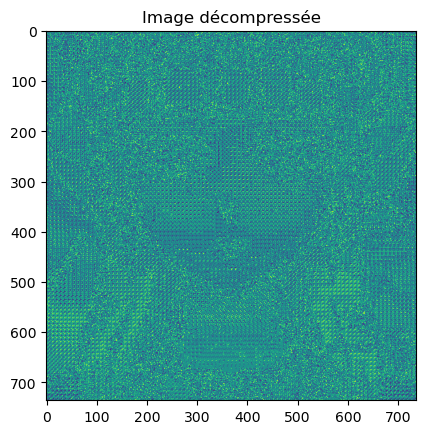

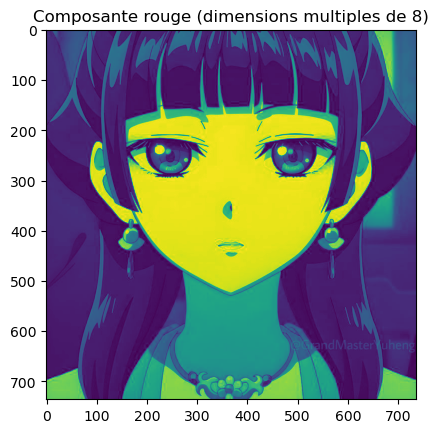

In [87]:
image_decompressée = np.zeros_like(composante_rouge_centrée)
# Décompression par blocs 8x8
for i in range(0, hauteur, 8):
    for j in range(0, largeur, 8):
        # Extraire le bloc 8x8
        block = composante_rouge_centrée[i:i+8, j:j+8]
        # Multiplier par la matrice Q terme à terme
        block = block * Q

        # Appliquer la transformée inverse de la DCT M = P^T * D * P
        # Réassembler l'image décompressée
        image_decompressée[i:i+8, j:j+8] = np.matmul(np.matmul(P.T, block), P)

# Afficher l'image décompressée
plt.imshow(image_decompressée + 128)  # Ajouter 128 pour ramener aux valeurs originales
plt.title("Image décompressée")
plt.show()
plt.imshow(composante_rouge_tronquée)  # Affichage en niveaux de gris
plt.title("Composante rouge (dimensions multiples de 8)")
plt.show()